# Eliminar calles dentro del mismo grupo

In [5]:
import osmnx as ox
import networkx as nx 
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [2]:
point = (-0.206412, -78.499363)

[ 0  0 29 21 21 13 14 12 12  4  3 26 26 26  3  3  3 32  2  2 31  9 24 24
 24 16 16 16 14 28  2 31 14 34 28 17 34 17 20  6 17 14 10 15 15 18 33 30
 23 23 11 11 11 26 13  7 22  5  5 25  6 18 29 11 15  5  5 24  3 20 24  9
 24 24 24 24 24 24  3 25 27  1  9  0 16 16 16  2  7  7 33 33 33  8  8  8
  8  8  8  0  0  8  8  8  8 27 15  0  4  4 28 28 19  3  3 20 25 25  1  1
  6  6  7 23 22 22  2 10  6  6  6]


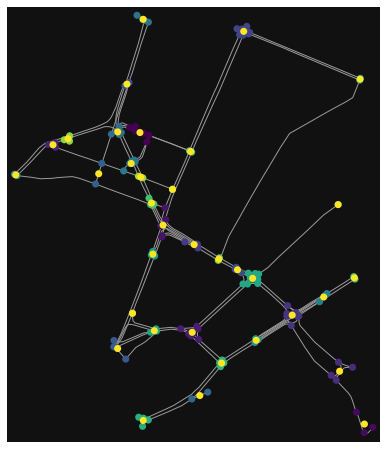

In [17]:
num_clusters = int(35)
point = (-0.206412, -78.499363)
filtro = '["highway"~"primary|secondary|tertiary"]'
graph = ox.graph_from_point(point, dist=1000, simplify=True, custom_filter=filtro)
g_nodes = list(graph.nodes)
positions = {}
for node_name in g_nodes:
    positions[node_name] = (graph.nodes[node_name]['x'],graph.nodes[node_name]['y'])
positions_x = nx.get_node_attributes(graph,'x')
positions_y = nx.get_node_attributes(graph,'y')
positions_for_data={'nodos':g_nodes,
    'position_x':positions_x.values(),
    'position_y':positions_y.values()}
data = pd.DataFrame.from_dict(positions_for_data)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['position_x','position_y']])
data_scaled = pd.DataFrame(data_scaled, columns=data.columns[1:])
cluster = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')  
colors_num = cluster.fit_predict(data_scaled)
print(colors_num)
labeldict = {}
for i,node_name in enumerate(g_nodes):
    labeldict[node_name] = colors_num[i]

data['cluster']=colors_num

centros = []
for cluster in range(max(colors_num)+1):
    indices = np.where(data['cluster']==cluster)
    grupo = data.iloc[indices]
    centro_x = grupo['position_x'].mean()
    centro_y = grupo['position_y'].mean()

    centros.append((centro_x,centro_y))        

inicio_nodos = 0
idx = inicio_nodos
colores_centros = []
for centro in centros:
    graph.add_node(idx)
    graph.nodes[idx]['x']=centro[0]
    graph.nodes[idx]['y']=centro[1]
    colores_centros.append(40)
    idx+=1

colors_num_2 = np.append(colors_num,colores_centros)

fig, ax = ox.plot_graph(graph,
    node_color=colors_num_2,    
    node_size=50)


In [18]:
data

,nodos,position_x,position_y,cluster
0,264268562,-78.500598,-0.202221,0
1,264268564,-78.500014,-0.202610,0
2,264268569,-78.498284,-0.203269,29
3,264270346,-78.490999,-0.200246,21
4,264270354,-78.490973,-0.200167,21
...,...,...,...,...
126,5183570478,-78.499472,-0.206960,2
127,6325538189,-78.501044,-0.200487,10
128,7009132784,-78.493927,-0.210743,6
129,7009133900,-78.493726,-0.210191,6


In [19]:
edges = list(graph.edges())

In [11]:
edges[:10]

[(264268564, 3069687543),
 (264268564, 264268569),
 (264268564, 4207542600),
 (264268569, 850445058),
 (264268569, 267939607),
 (264268569, 264268564),
 (264270346, 264270354),
 (264270346, 267939758),
 (264270354, 264270346),
 (264270354, 3726280025)]

In [30]:
nodo1, nodo2 = 264270354,264270354

Comparación para sabe si la calle conecta dos nodos del mismo grupo.

In [32]:
if (int(data['cluster'][np.where(data['nodos']==nodo1)[0]]) == 
  int(data['cluster'][np.where(data['nodos']==nodo2)[0]])):
    print('Hello')

Hello


In [20]:
for nodo1,nodo2 in edges:
    if (int(data['cluster'][np.where(data['nodos']==nodo1)[0]]) == 
      int(data['cluster'][np.where(data['nodos']==nodo2)[0]])):
        #se quitan las calles del mismo grupo
        graph.remove_edge(nodo1,nodo2)
    

Ahora hay que graficar sólo las calles válidas.

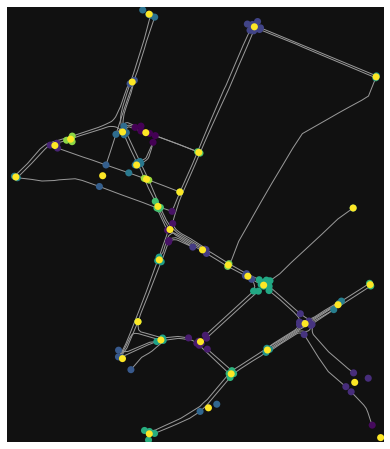

In [21]:
fig, ax = ox.plot_graph(graph,
    node_color=colors_num_2,    
    node_size=50)

In [22]:
len(graph.edges())

90

In [23]:
len(graph.nodes())

166